## Task2

Ref:
1. https://pytorch.apachecn.org/docs/1.0/pytorch_with_examples.html
2. https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817

### numpy和PyTorch实现梯度下降法

In [25]:
import numpy as np

# N是批大小；D_in是输入维度
# H是隐藏层维度；D_out是输出维度  
N, D_in, H, D_out = 64, 1000, 100, 10

# 产生随机输入和输出数据
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# 随机初始化权重
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(300):
    # 前向传播：计算预测值y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)

    # 计算并显示loss（损失）
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # 反向传播，计算w1、w2对loss的梯度
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # 更新权重
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 36123973.62207095
1 38697817.65806739
2 44781176.62733148
3 44940620.18360953
4 34195266.79405044
5 18665911.449616555
6 8183568.813241738
7 3611387.8770753928
8 1950145.3656844785
9 1304456.7116623612
10 993719.5546844036
11 804274.9240340337
12 669051.9732182666
13 564419.5935986292
14 480278.7578169184
15 411335.1868939086
16 354192.2099817307
17 306380.5327330087
18 266161.09821974655
19 232143.21698095748
20 203190.40776076156
21 178468.01024074134
22 157275.57403753654
23 139029.657586293
24 123263.42750879537
25 109600.80486312733
26 97710.71601418189
27 87320.77806321466
28 78216.83642167874
29 70219.84410118137
30 63185.06435718865
31 57015.22838036384
32 51545.26599525836
33 46687.05932273003
34 42364.9725352428
35 38503.62959519438
36 35051.55743916841
37 31958.502378932288
38 29182.126974432984
39 26686.80675506353
40 24452.494528913197
41 22438.23073401255
42 20616.42515322082
43 18966.09356295305
44 17470.19535286518
45 16110.345678067803
46 14872.466179897798
47 13744.

In [24]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 

# N是批大小； D_in 是输入维度；
# H 是隐藏层维度； D_out 是输出维度
N, D_in, H, D_out = 64, 1000, 100, 10

# 产生随机输入和输出数据
x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)

# 随机初始化权重
w1 = torch.randn(D_in, H, device=device)
w2 = torch.randn(H, D_out, device=device)

learning_rate = 1e-6
for t in range(300):
    # 前向传播：计算预测值y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    # 计算并输出loss；loss是存储在PyTorch的tensor中的标量，维度是()（零维标量）；我们使用loss.item()得到tensor中的纯python数值。
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())

    # 反向传播，计算w1、w2对loss的梯度
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # 使用梯度下降更新权重
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 25796850.0
1 21595896.0
2 21576594.0
3 22803592.0
4 22903994.0
5 20504596.0
6 15740988.0
7 10547798.0
8 6385464.0
9 3743905.5
10 2237164.0
11 1423912.875
12 978546.5
13 724271.875
14 568308.5625
15 464823.5
16 390766.0
17 334398.6875
18 289574.6875
19 252845.6875
20 222091.65625
21 195962.21875
22 173561.53125
23 154213.96875
24 137423.09375
25 122762.921875
26 109932.46875
27 98670.5078125
28 88753.0546875
29 79986.8125
30 72249.8828125
31 65378.25
32 59254.6953125
33 53785.109375
34 48892.20703125
35 44503.8515625
36 40562.28125
37 37015.5546875
38 33818.21875
39 30933.30078125
40 28324.7890625
41 25963.8671875
42 23823.33984375
43 21879.82421875
44 20113.16015625
45 18505.390625
46 17040.390625
47 15704.0859375
48 14483.88671875
49 13369.140625
50 12348.7177734375
51 11413.833984375
52 10557.171875
53 9770.943359375
54 9049.21484375
55 8385.4619140625
56 7774.97509765625
57 7213.16064453125
58 6695.6689453125
59 6218.5849609375
60 5778.07861328125
61 5371.349609375
62 4995.6528320

### numpy和PyTorch实现线性回归

In [14]:
import numpy as np
np.random.seed(2333)

# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 + np.random.random() for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [15]:
print(y_train)

[[ 1.5297776]
 [ 3.8944874]
 [ 5.242338 ]
 [ 7.9269605]
 [ 9.191861 ]
 [11.387585 ]
 [13.287302 ]
 [15.729676 ]
 [17.43938  ]
 [19.30325  ]
 [21.393335 ]]


In [16]:
import torch
from torch.autograd import Variable

class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out
    
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()
    
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [17]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(304.3204, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 0, loss 304.3204040527344
tensor(25.2250, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 1, loss 25.225019454956055
tensor(2.4562, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 2, loss 2.4561500549316406
tensor(0.5951, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 3, loss 0.5950658321380615
tensor(0.4394, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 4, loss 0.43940770626068115
tensor(0.4229, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 5, loss 0.42289915680885315
tensor(0.4178, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 6, loss 0.41778305172920227
tensor(0.4136, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 7, loss 0.41363832354545593
tensor(0.4096, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 8, loss 0.40961435437202454
tensor(0.4056, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 9, loss 0.4056415557861328
tensor(0.4017, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 10, loss

[[ 0.9438095]
 [ 3.0146153]
 [ 5.085421 ]
 [ 7.156227 ]
 [ 9.227033 ]
 [11.297838 ]
 [13.368645 ]
 [15.43945  ]
 [17.510256 ]
 [19.581062 ]
 [21.651867 ]]


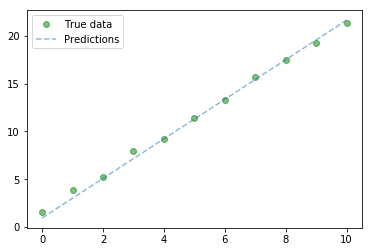

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

### PyTorch实现一个简单的神经网络
Ref:
https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)


params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight


input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)


net.zero_grad()
out.backward(torch.randn(1, 10))


output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)


print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU


net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)


learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)


import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
10
torch.Size([6, 1, 5, 5])
tensor([[-0.0016, -0.0701,  0.0672,  0.1103,  0.0444, -0.0310,  0.0073,  0.0326,
         -0.1183,  0.0337]], grad_fn=<AddmmBackward>)
tensor(0.6612, grad_fn=<MseLossBackward>)
conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0047,  0.0096, -0.0064,  0.0018,  0.0012, -0.0068])
